In [1]:
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf

In [79]:
# Open population data (raster 5 = 2020 population)
ds = xr.open_dataset('../data/processed/population.nc').sel(raster=5)
ds = ds.rename({'UN WPP-Adjusted Population Count, v4.11 (2000, 2005, 2010, 2015, 2020): 1 degree':'population'})
ds = ds.where(np.isfinite(ds['population']),0)

In [80]:
# Regrid population data first to be 0-360, not -180-180
ds = ds.assign_coords({'longitude':ds['longitude']%360})

In [81]:
# Open example data file with desired gridding
ds_ex = xr.open_dataset('../data/processed/wbt.land_area')

In [82]:
# Get arrays for desired lat and lon values
regrid_lat = ds_ex['lat'].values
regrid_lon = ds_ex['lon'].values

In [83]:
# Regrid dataset
ds_regrid = ds.interp({'latitude':regrid_lat,'longitude':regrid_lon})

In [84]:
ds_regrid.to_netcdf('../data/processed/population_regrid.nc')

# Population Maps

In [2]:
# Population data
ds_pop = xr.open_dataset('../data/processed/population_regrid.nc')['population']
ds_pop = ds_pop.where(np.isfinite(ds_pop),0)
ds_pop = ds_pop.rename({'latitude':'lat','longitude':'lon'})

In [8]:
# Load area data
land_area = xr.open_dataset('../data/processed/wbt.land_area')
land_mask = np.isfinite(land_area)
# Replace NaN with 0 
land_area_adj = land_area.where(land_mask,0).rename({'__xarray_dataarray_variable__':'land_area'})
land_area_adj = land_area_adj['land_area'].isel(ensemble=0)

In [11]:
pop_dens = ds_pop/land_area_adj

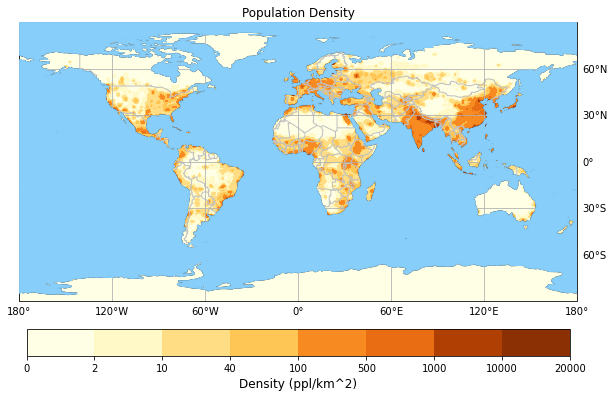

In [48]:
mf.contour_plot(pop_dens,'Global','Population Density',cmap(np.linspace(0,1,9)),borders=True,label='Density (ppl/km^2)')

In [39]:
cmap = plt.cm.get_cmap('YlOrBr', 12)

In [46]:
cmap(np.linspace(0,1,7))

array([[1.        , 1.        , 0.89803922, 1.        ],
       [0.99821747, 0.93297683, 0.66060606, 1.        ],
       [0.99607843, 0.77967914, 0.33333333, 1.        ],
       [0.97040998, 0.54153298, 0.13083779, 1.        ],
       [0.8228164 , 0.32370766, 0.02067736, 1.        ],
       [0.54545455, 0.18787879, 0.01782531, 1.        ],
       [0.4       , 0.14509804, 0.02352941, 1.        ]])